# Data Understanding

# Kualitas Udara SVM dan Logistic Regression 

Dataset ini memuat informasi tentang Indeks Standar Pencemar Udara (ISPU) yang diukur di lima stasiun pemantau kualitas udara (SPKU) di Provinsi DKI Jakarta dari tahun 2016 hingga tahun 2020.

Variabel yang terdapat dalam dataset ini dijelaskan sebagai berikut:

- tanggal: Tanggal ketika pengukuran kualitas udara dilakukan.
- stasiun: Lokasi pengukuran di stasiun pemantau kualitas udara.
- pm10: Partikulat Matter atau PM10 berasal dari berbagai aktivitas manusia seperti pembakaran bahan bakar, industri, dan konstruksi. Debu jalan raya juga dapat menjadi sumber partikulat matter ini.
- so2: Sulfur Dioksida dihasilkan dari pembakaran bahan bakar fosil, terutama yang mengandung belerang. Bahan bakar seperti batu bara dan minyak bumi adalah sumber utama SO2.
- co: Carbon Monoxide Gas beracun berasal dari pembakaran tidak sempurna bahan bakar, termasuk pembakaran kayu, gas alam, dan bahan bakar fosil seperti bensin dan diesel.
- o3: Ozon di tingkat permukaan terbentuk melalui reaksi kimia antara oksigen dan polutan lainnya, diperkuat oleh paparan sinar matahari.
- no2: Nitrogen Dioksida berasal dari aktivitas pembakaran bahan bakar fosil, seperti pada kendaraan bermotor, pembangkit listrik, dan industri.
- max: Nilai tertinggi dari seluruh parameter yang diukur dalam waktu yang sama.
- critical: Parameter yang memiliki hasil pengukuran tertinggi pada saat pengukuran.
- categori: Kategori hasil perhitungan Indeks Standar Pencemaran Udara (ISPU), yang mencerminkan tingkat pencemaran udara pada waktu tertentu.


Dataset ini dapat digunakan untuk menganalisis tren kualitas udara, mengidentifikasi stasiun dengan tingkat pencemaran tertinggi, dan memahami dampak parameter-parameter tertentu terhadap indeks pencemaran udara.

Mengimport library yang dibutuhkan.

In [1]:
import numpy as np 
from numpy import mean 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
print('Import Library Berhasil dilakukan ^_^')

Import Library Berhasil dilakukan ^_^


Load data ISPU tahun 2016

In [2]:
jan16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2016.csv')
feb16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2016.csv')
mar16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2016.csv')
apr16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2016.csv')
mei16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2016.csv')
jun16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2016.csv')
jul16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-juli-tahun-2016.csv')
agu16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-agustus-tahun-2016.csv')
sep16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-september-tahun-2016.csv')
okt16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-oktober-tahun-2016.csv')
nov16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-november-tahun-2016.csv')
des16 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2016/indeks-standar-pencemar-udara-di-spku-bulan-desember-tahun-2016.csv')

Load data ISPU tahun 2017

In [3]:
jan17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2017.csv')
feb17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2017.csv')
mar17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2017.csv')
apr17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2017.csv')
mei17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2017.csv')
jun17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2017.csv')
jul17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-juli-tahun-2017.csv')
agu17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-agustus-tahun-2017.csv')
sep17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-september-tahun-2017.csv')
okt17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-oktober-tahun-2017.csv')
nov17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-november-tahun-2017.csv')
des17 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2017/indeks-standar-pencemar-udara-di-spku-bulan-desember-tahun-2017.csv')

Load data ISPU tahun 2018

In [4]:
jan18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2018.csv')
feb18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2018.csv')
mar18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2018.csv')
apr18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2018.csv')
mei18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2018.csv')
jun18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2018.csv')
jul18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-juli-tahun-2018.csv')
agu18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-agustus-tahun-2018.csv')
sep18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-september-tahun-2018.csv')
okt18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-oktober-tahun-2018.csv')
nov18 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/data-indeks-standar-pencemar-udara-di-spku-bulan-november-tahun-2018.csv')
des18 = pd.read_csv("D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2018/indeks-standar-pencemar-udara-di-spku-bulan-desember-tahun-2018.csv")

Load data ISPU tahun 2019

In [5]:
jan19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2019 (1).csv')
feb19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2019 (1).csv')
mar19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2019 (1).csv')
apr19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2019 (1).csv')
mei19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2019 (1).csv')
jun19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2019 (1).csv')
jul19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-juli-tahun-2019 (1).csv')
agu19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-agustus-tahun-2019 (1).csv')
sep19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-september-tahun-2019 (1).csv')
okt19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-oktober-tahun-2019 (1).csv')
nov19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-november-tahun-2019 (1).csv')
des19 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2019/indeks-standar-pencemar-udara-di-spku-bulan-desember-tahun-2019 (1).csv')

Load data ISPU tahun 2020

In [6]:
jan20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2020.csv')
feb20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2020.csv')
mar20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2020.csv')
apr20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2020.csv')
mei20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2020.csv')
jun20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2020.csv')
jul20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-juli-tahun-2020.csv')
agu20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-agustus-tahun-2020.csv')
sep20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-september-tahun-2020.csv')
okt20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-oktober-tahun-2020.csv')
nov20 = pd.read_csv('D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-november-tahun-2020.csv')
des20 = pd.read_csv("D:/Kuliah/Semester 7/Internship/Project Kualitas Udara/Dataset/ISPU 2020/indeks-standar-pencemar-udara-di-spku-bulan-desember-tahun-2020.csv")

Menggabungkan DataFrame yang mewakili data bulanan menjadi satu DataFrame tunggal. Ini mempermudah analisis data atau pemrosesan data yang melibatkan seluruh rentang waktu yang diwakili oleh DataFrame bulanan tersebut.

In [7]:
df_list = [jan16, jan17, jan18, jan19, jan20,
           feb16, feb17, feb18, feb19, feb20,
           mar16, mar17, mar18, mar19, mar20,
           apr16, apr17, apr18, apr19, apr20,
           mei16, mei17, mei18, mei19, mei20,
           jun16, jun17, jun18, jun19, jun20,
           jul16, jul17, jul18, jul19, jul20,
           agu16, agu17, agu18, agu19, agu20,
           sep16, sep17, sep18, sep19, sep20,
           okt16, okt17, okt18, okt19, okt20,
           nov16, nov17, nov18, nov19, nov20,
           des16, des17, des18, des19, des20]
combined_df = pd.concat(df_list, ignore_index=True)

Menampilkan 5 data teratas setelah digabungkan

In [8]:
combined_df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,kategori
0,2016-01-01,DKI1 (Bunderan HI),59,19,27,31,1,59.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,DKI1 (Bunderan HI),52,19,---,33,2,52.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,DKI1 (Bunderan HI),44,19,---,36,2,44.0,PM10,BAIK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,DKI1 (Bunderan HI),58,21,---,46,5,58.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,DKI1 (Bunderan HI),70,19,---,41,4,70.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Menampilkan jumlah baris dan kolom dalam DataFrame “combined_df” atau ukuran data.

In [9]:
combined_df.shape

(9170, 25)

Menampilkan statiska deskriptif dalam DataFrame “combined_df”.

In [10]:
combined_df.describe()

,max,s02,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
count,9103.000000,143.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,69.638361,20.685315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.020242,7.255323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,51.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,66.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,85.000000,23.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,243.000000,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Menampilkan kolom yang ada dalam DataFrame "combined_df"

In [11]:
combined_df.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori', 's02', 'keterangan', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'kategori'],
      dtype='object')

Menampilkan tipe data dalam DataFrame “combined_df”.

In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9170 entries, 0 to 9169
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tanggal      9135 non-null   object 
 1   stasiun      9135 non-null   object 
 2   pm10         9084 non-null   object 
 3   so2          8925 non-null   object 
 4   co           9074 non-null   object 
 5   o3           9025 non-null   object 
 6   no2          9036 non-null   object 
 7   max          9103 non-null   float64
 8   critical     8982 non-null   object 
 9   categori     8977 non-null   object 
 10  s02          143 non-null    float64
 11  keterangan   150 non-null    object 
 12  Unnamed: 10  0 non-null      float64
 13  Unnamed: 11  0 non-null      float64
 14  Unnamed: 12  0 non-null      float64
 15  Unnamed: 13  0 non-null      float64
 16  Unnamed: 14  0 non-null      float64
 17  Unnamed: 15  0 non-null      float64
 18  Unnamed: 16  0 non-null      float64
 19  Unname

Menampilkan nilai unik dalam setiap kolom DataFrame untuk mendapatkan pemahaman cepat tentang seberapa bervariasi data dalam setiap kolom.

In [13]:
cardinalities = combined_df.nunique()
cardinalities

tanggal        1854
stasiun          55
pm10            204
so2             163
co              191
o3              403
no2             198
max             219
critical         10
categori          9
s02              29
keterangan        5
Unnamed: 10       0
Unnamed: 11       0
Unnamed: 12       0
Unnamed: 13       0
Unnamed: 14       0
Unnamed: 15       0
Unnamed: 16       0
Unnamed: 17       0
Unnamed: 18       0
Unnamed: 19       0
Unnamed: 20       0
Unnamed: 21       0
kategori          5
dtype: int64

# Data Preparation

Menghapus kolom-kolom tertentu dari DataFrame combined_df. Kolom-kolom yang akan dihapus didefinisikan dalam list columns_to_drop.

In [14]:
columns_to_drop = ['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                   'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
                   'Unnamed: 20', 'Unnamed: 21','keterangan', 'kategori', 's02']

combined_df = combined_df.drop(columns=columns_to_drop)

Menampilkan kolom yang ada dalam DataFrame "combined_df"

In [15]:
combined_df.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori'],
      dtype='object')

Merubah tipe data pada kolom tanggal menjadi datetime

In [16]:
combined_df['tanggal']=pd.to_datetime(combined_df['tanggal'])

Menampilkan tipe data dalam DataFrame “combined_df”.

In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9170 entries, 0 to 9169
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   9135 non-null   datetime64[ns]
 1   stasiun   9135 non-null   object        
 2   pm10      9084 non-null   object        
 3   so2       8925 non-null   object        
 4   co        9074 non-null   object        
 5   o3        9025 non-null   object        
 6   no2       9036 non-null   object        
 7   max       9103 non-null   float64       
 8   critical  8982 non-null   object        
 9   categori  8977 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 716.5+ KB


Variabel numeric_columns berisi daftar nama kolom-kolom dalam DataFrame combined_df yang diasumsikan berisi data numerik. Kolom-kolom tersebut adalah 'pm10', 'so2', 'co', 'o3', dan 'no2'.

In [18]:
numeric_columns = ['pm10', 'so2', 'co', 'o3', 'no2']

Merubah nilai-nilai dalam kolom-kolom numerik yang terdapat dalam DataFrame combined_df menjadi tipe data numerik.

In [19]:
combined_df[numeric_columns] = combined_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

Menampilkan tipe data dalam DataFrame “combined_df”.

In [20]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9170 entries, 0 to 9169
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   9135 non-null   datetime64[ns]
 1   stasiun   9135 non-null   object        
 2   pm10      8695 non-null   float64       
 3   so2       8663 non-null   float64       
 4   co        8778 non-null   float64       
 5   o3        8744 non-null   float64       
 6   no2       8700 non-null   float64       
 7   max       9103 non-null   float64       
 8   critical  8982 non-null   object        
 9   categori  8977 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 716.5+ KB


Menampilkan daftar nilai unik dalam kolom 'stasiun' beserta jumlah kemunculannya masing-masing. 

In [21]:
combined_df['stasiun'].value_counts()

DKI1 (Bunderan HI)                  1796
DKI2 (Kelapa Gading)                1796
DKI3 (Jagakarsa)                    1796
DKI4 (Lubang Buaya)                 1796
DKI5 (Kebon Jeruk) Jakarta Barat    1372
DKI5 (Kebon Jeruk)                   424
43                                    10
34                                     8
54                                     8
40                                     8
44                                     7
50                                     6
51                                     6
45                                     6
53                                     5
48                                     5
56                                     5
65                                     4
59                                     4
62                                     4
58                                     4
38                                     3
---                                    3
32                                     3
42              

Merubah nilai 'DKI5 (Kebon Jeruk) Jakarta Barat' dalam kolom 'stasiun' DataFrame combined_df dengan 'DKI5 (Kebon Jeruk)'. Hal ini dilakukan karena data diambil selama 5 tahun dan setiap tahun mungkin ada variasi atau perubahan dalam nama stasiun pengukuran, tetapi untuk tujuan analisis, memutuskan untuk menyamakan semuanya menjadi 'DKI5 (Kebon Jeruk)' untuk konsistensi dan simplifikasi. 

In [22]:
mapping_stasiun = {
    'DKI5 (Kebon Jeruk) Jakarta Barat': 'DKI5 (Kebon Jeruk)',
}

combined_df['stasiun'] = combined_df['stasiun'].replace(mapping_stasiun)

Mengambil DataFrame baru "combined_df" yang hanya berisi baris-baris yang memiliki nilai 'stasiun' dalam kelompok yang relevan, yaitu 'DKI1 (Bunderan HI)', 'DKI5 (Kebon Jeruk)', 'DKI3 (Jagakarsa)', 'DKI2 (Kelapa Gading)', dan 'DKI4 (Lubang Buaya)'. Baris-baris lain yang memiliki nilai 'stasiun' di luar kelompok ini dihilangkan.

In [23]:
combined_df = combined_df[combined_df['stasiun'].isin(['DKI1 (Bunderan HI)', 
                                                       'DKI5 (Kebon Jeruk)', 
                                                       'DKI3 (Jagakarsa)', 
                                                       'DKI2 (Kelapa Gading)', 
                                                       'DKI4 (Lubang Buaya)'])]

Menampilkan daftar nilai unik dalam kolom 'stasiun' beserta jumlah kemunculannya masing-masing. 

In [24]:
combined_df['stasiun'].value_counts()

DKI1 (Bunderan HI)      1796
DKI2 (Kelapa Gading)    1796
DKI3 (Jagakarsa)        1796
DKI4 (Lubang Buaya)     1796
DKI5 (Kebon Jeruk)      1796
Name: stasiun, dtype: int64

Mengambil DataFrame baru combined_df yang hanya berisi baris-baris yang memiliki nilai 'categori' dalam kelompok yang relevan, yaitu 'SEDANG', 'TIDAK SEHAT', 'BAIK', dan 'SANGAT TIDAK SEHAT'. Baris-baris lain yang memiliki nilai 'categori' di luar kelompok ini dihilangkan.

In [25]:
combined_df = combined_df[combined_df['categori'].isin(['SEDANG', 
                                                        'TIDAK SEHAT', 
                                                        'BAIK',
                                                        'SANGAT TIDAK SEHAT'])]

Menampilkan daftar nilai unik dalam kolom 'categori' beserta jumlah kemunculannya masing-masing. 

In [26]:
combined_df['categori'].value_counts()

SEDANG                5637
BAIK                  1722
TIDAK SEHAT           1137
SANGAT TIDAK SEHAT      33
Name: categori, dtype: int64

Mengidentifikasi nilai-nilai yang hilang (NaN) / Missing Value dalam DataFrame combined_df, dan kemudian menggunakan sum() untuk menghitung jumlah nilai yang hilang untuk setiap kolom.

In [27]:
combined_df.isna().sum()

tanggal       0
stasiun       0
pm10        269
so2         161
co          202
o3          218
no2         269
max           0
critical      0
categori      0
dtype: int64

Menampilkan informasi tentang nilai-nilai null (NaN) dalam setiap kolom, termasuk total nilai null, total data, dan persentase missing value.

In [28]:
for column in combined_df.columns:
    total_null = combined_df[column].isnull().sum()
    total_data = len(combined_df[column])
    percent_missing = (total_null / total_data) * 100
    
    print(f"Kolom : {column}")
    print(f"Total nilai null: {total_null}")
    print(f"Total data: {total_data}")
    print(f"Persentase missing value: {percent_missing:.2f}%")
    print('')

Kolom : tanggal
Total nilai null: 0
Total data: 8529
Persentase missing value: 0.00%

Kolom : stasiun
Total nilai null: 0
Total data: 8529
Persentase missing value: 0.00%

Kolom : pm10
Total nilai null: 269
Total data: 8529
Persentase missing value: 3.15%

Kolom : so2
Total nilai null: 161
Total data: 8529
Persentase missing value: 1.89%

Kolom : co
Total nilai null: 202
Total data: 8529
Persentase missing value: 2.37%

Kolom : o3
Total nilai null: 218
Total data: 8529
Persentase missing value: 2.56%

Kolom : no2
Total nilai null: 269
Total data: 8529
Persentase missing value: 3.15%

Kolom : max
Total nilai null: 0
Total data: 8529
Persentase missing value: 0.00%

Kolom : critical
Total nilai null: 0
Total data: 8529
Persentase missing value: 0.00%

Kolom : categori
Total nilai null: 0
Total data: 8529
Persentase missing value: 0.00%



Menampilkan baris-baris duplikat dalam DataFrame combined_df. Hasilnya adalah mencetak jumlah total data duplikat.

In [29]:
duplicate_rows = combined_df[combined_df.duplicated()]

print("Jumlah total data duplikat:", len(duplicate_rows))

Jumlah total data duplikat: 0


Pengisian nilai yang hilang (missing value) dengan menggunakan median pada kolom-kolom data numerik seperti 'pm10', 'so2', 'co', 'o3', 'no2', dan 'max' adalah suatu pilihan yang umumnya digunakan dalam penanganan missing value.

In [30]:
combined_df["pm10"]=combined_df["pm10"].fillna(combined_df["pm10"].median())
combined_df["so2"]=combined_df["so2"].fillna(combined_df["so2"].median())
combined_df["co"]=combined_df["co"].fillna(combined_df["co"].median())
combined_df["o3"]=combined_df["o3"].fillna(combined_df["o3"].median())
combined_df["no2"]=combined_df["no2"].fillna(combined_df["no2"].median())
combined_df["max"]=combined_df["max"].fillna(combined_df["max"].median())

Mengidentifikasi nilai-nilai yang hilang (NaN) / Missing Value dalam DataFrame combined_df, dan kemudian menggunakan sum() untuk menghitung jumlah nilai yang hilang untuk setiap kolom.

In [31]:
combined_df.isna().sum()

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

Menampilkan jumlah baris dan kolom dalam DataFrame “combined_df” atau ukuran data.

In [32]:
combined_df.shape

(8529, 10)

Menampilkan daftar nilai unik dalam kolom 'categori' beserta jumlah kemunculannya masing-masing. 

In [33]:
combined_df['categori'].value_counts()

SEDANG                5637
BAIK                  1722
TIDAK SEHAT           1137
SANGAT TIDAK SEHAT      33
Name: categori, dtype: int64

Menampilkan daftar nilai unik dalam kolom 'stasiun' beserta jumlah kemunculannya masing-masing. 

In [34]:
combined_df['stasiun'].value_counts()

DKI2 (Kelapa Gading)    1723
DKI5 (Kebon Jeruk)      1719
DKI4 (Lubang Buaya)     1707
DKI1 (Bunderan HI)      1696
DKI3 (Jagakarsa)        1684
Name: stasiun, dtype: int64

# Exploratory Data Analysis
Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

## Visualisasi data
Ekstrak tahun dari kolom `tanggal`

In [35]:
combined_df['tahun'] = combined_df['tanggal'].dt.year

### 1. Bagaimana distribusi kategori kualitas udara di Provinsi DKI Jakarta dari tahun 2016 hingga 2020?

Membuat DataFrame baru hanya dengan kategori "BAIK", "SEDANG", "TIDAK SEHAT" dan "SANGAT TIDAK SEHAT"

In [36]:
df_categori = combined_df[combined_df['categori'].isin(['SEDANG','BAIK',
                                                        'TIDAK SEHAT',
                                                        'SANGAT TIDAK SEHAT'])]

Menampilkan 5 data teratas

In [37]:
df_categori.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,tahun
0,2016-01-01,DKI1 (Bunderan HI),59.0,19.0,27.0,31.0,1.0,59.0,PM10,SEDANG,2016
1,2016-01-02,DKI1 (Bunderan HI),52.0,19.0,17.0,33.0,2.0,52.0,PM10,SEDANG,2016
2,2016-01-03,DKI1 (Bunderan HI),44.0,19.0,17.0,36.0,2.0,44.0,PM10,BAIK,2016
3,2016-01-04,DKI1 (Bunderan HI),58.0,21.0,17.0,46.0,5.0,58.0,PM10,SEDANG,2016
4,2016-01-05,DKI1 (Bunderan HI),70.0,19.0,17.0,41.0,4.0,70.0,PM10,SEDANG,2016


Menghitung jumlah data untuk setiap tahun

In [38]:
jumlah_per_tahun = df_categori.groupby(['tahun', 'categori']).size().unstack()

Menampilkan hasil perhitungan pada variabel "jumlah_per_tahun"

In [39]:
jumlah_per_tahun

categori,BAIK,SANGAT TIDAK SEHAT,SEDANG,TIDAK SEHAT
tahun,,,,
2016,379.0,1.0,1258.0,155.0
2017,476.0,NaN,1121.0,198.0
2018,311.0,24.0,835.0,317.0
2019,207.0,8.0,1240.0,337.0
2020,349.0,NaN,1183.0,130.0


<Figure size 1600x800 with 0 Axes>

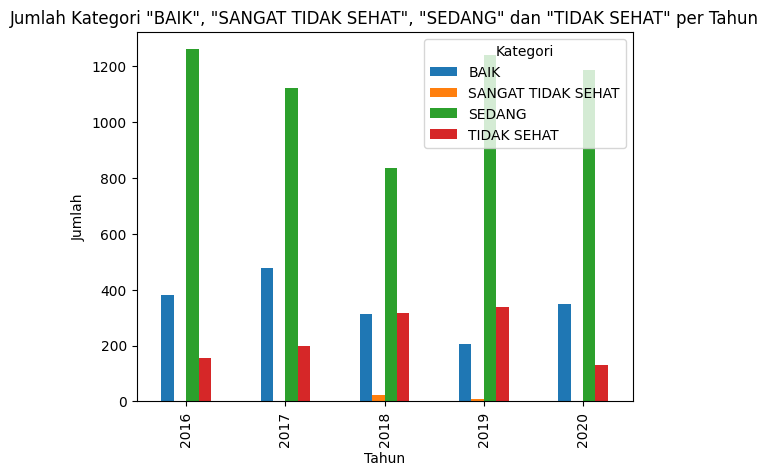

In [40]:
plt.figure(figsize=(16, 8))
jumlah_per_tahun.plot(kind='bar', stacked=False)
plt.title('Jumlah Kategori "BAIK", "SANGAT TIDAK SEHAT", "SEDANG" dan "TIDAK SEHAT" per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.legend(title='Kategori')

# Save the figure as PNG
plt.savefig('output_figure.png')

plt.show()

### Kesimpulan Visualisasi Kategori Kualitas Udara


Berdasarkan distribusi kategori kualitas udara di Provinsi DKI Jakarta dari tahun 2016 hingga 2020, dapat diambil beberapa kesimpulan:

- Kategori "BAIK":

Jumlah pengukuran kategori "BAIK" cenderung fluktuatif dari tahun ke tahun.
Pada tahun 2018, terdapat peningkatan jumlah pengukuran kategori "BAIK," tetapi kemudian mengalami penurunan pada tahun 2019.

- Kategori "SEDANG":

Jumlah pengukuran kategori "SEDANG" menunjukkan fluktuasi, dengan beberapa tahun mengalami peningkatan dan penurunan.
Pada tahun 2018, terdapat peningkatan yang signifikan dibandingkan tahun sebelumnya.

- Kategori "TIDAK SEHAT":

Jumlah pengukuran kategori "TIDAK SEHAT" juga mengalami fluktuasi dari tahun ke tahun.
Pada tahun 2018, terdapat peningkatan yang signifikan, kemudian mengalami penurunan pada tahun 2019.

- Kategori "SANGAT TIDAK SEHAT":

Jumlah pengukuran kategori "SANGAT TIDAK SEHAT" cenderung rendah dan terjadi pada tahun-tahun tertentu.

- Umum:

Secara umum, distribusi kategori kualitas udara di Provinsi DKI Jakarta menunjukkan fluktuasi yang dapat disebabkan oleh berbagai faktor, seperti cuaca, aktivitas manusia, dan kebijakan lingkungan.
Perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor yang mungkin mempengaruhi perubahan dalam distribusi kategori kualitas udara.

### 2.Bagaimana perbandingan jumlah kategori "BAIK", "SEDANG", "TIDAK SEHAT" dan "SANGAT TIDAK SEHAT" di antara stasiun pemantau kualitas udara di Provinsi DKI Jakarta?

Mengelompokkan data berdasarkan stasiun dan kategori, kemudian menghitung jumlah

In [41]:
grouped_data = combined_df.groupby(['stasiun', 'categori']).size().reset_index(name='jumlah')

In [42]:
grouped_data

,stasiun,categori,jumlah
0,DKI1 (Bunderan HI),BAIK,542
1,DKI1 (Bunderan HI),SEDANG,1100
2,DKI1 (Bunderan HI),TIDAK SEHAT,54
3,DKI2 (Kelapa Gading),BAIK,329
4,DKI2 (Kelapa Gading),SANGAT TIDAK SEHAT,11
5,DKI2 (Kelapa Gading),SEDANG,1122
6,DKI2 (Kelapa Gading),TIDAK SEHAT,261
7,DKI3 (Jagakarsa),BAIK,248
8,DKI3 (Jagakarsa),SEDANG,1128
9,DKI3 (Jagakarsa),TIDAK SEHAT,308


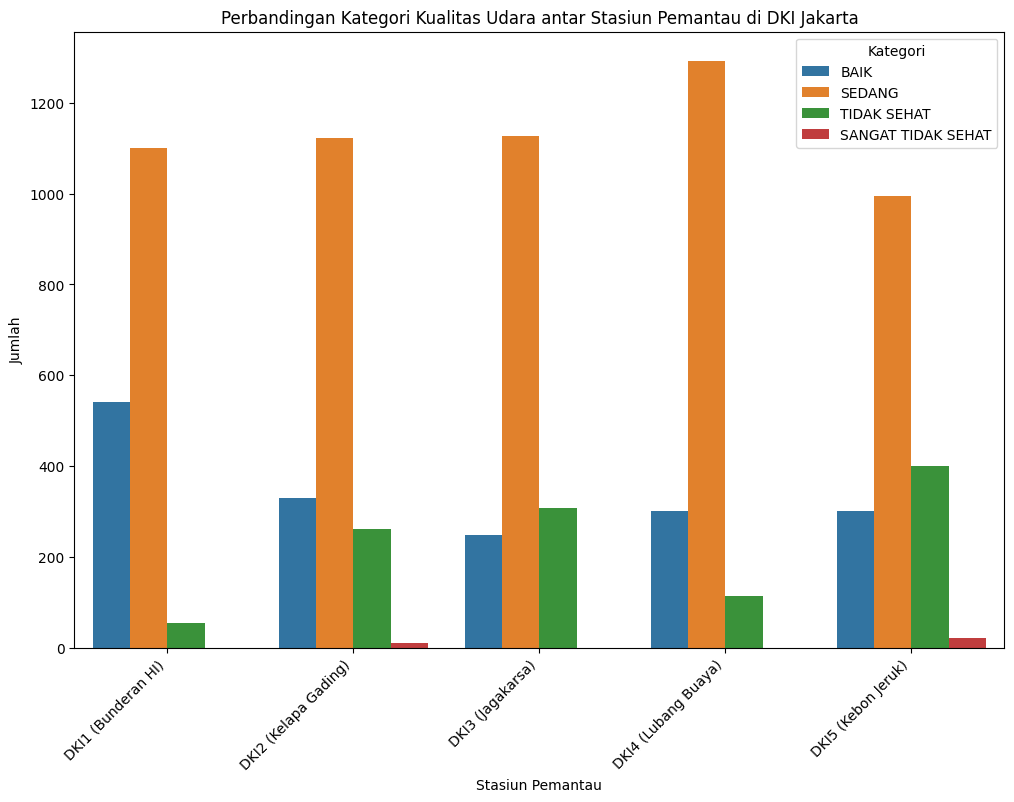

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x='stasiun', y='jumlah', hue='categori', data=grouped_data)
plt.title('Perbandingan Kategori Kualitas Udara antar Stasiun Pemantau di DKI Jakarta')
plt.xlabel('Stasiun Pemantau')
plt.ylabel('Jumlah')
plt.legend(title='Kategori')
plt.xticks(rotation=45, ha='right')
plt.show()

### Kesimpulan Visualisasi Kualitas Udara Pada Setiap Stasiun

Berdasarkan data visualisasi kualitas udara di beberapa stasiun pemantau di Provinsi DKI Jakarta, berikut adalah kesimpulan:

1. DKI1 (Bunderan HI):

- Kategori "SEDANG" memiliki jumlah pengukuran tertinggi di DKI1 (Bunderan HI).
- Kategori "TIDAK SEHAT" memiliki jumlah yang rendah dibandingkan "SEDANG" dan "BAIK."

2. DKI2 (Kelapa Gading):

- DKI2 (Kelapa Gading) menunjukkan jumlah pengukuran tertinggi pada kategori "SEDANG."
- Terdapat pengukuran dalam kategori "SANGAT TIDAK SEHAT" yang relatif rendah.

3. DKI3 (Jagakarsa):

- Kategori "SEDANG" juga mendominasi di DKI3 (Jagakarsa).
- Jumlah pengukuran dalam kategori "TIDAK SEHAT" cukup tinggi.

4. DKI4 (Lubang Buaya):

- DKI4 (Lubang Buaya) memiliki jumlah pengukuran tertinggi dalam kategori "SEDANG."
- Kategori "TIDAK SEHAT" juga memiliki jumlah yang signifikan.

5. DKI5 (Kebon Jeruk):

- Kategori "SEDANG" mendominasi di DKI5 (Kebon Jeruk).
- Ada pengukuran dalam kategori "SANGAT TIDAK SEHAT" yang cukup signifikan.
- Kategori "TIDAK SEHAT" memiliki jumlah yang tinggi.

**Kesimpulan Umum:**

- Mayoritas stasiun pemantau memiliki jumlah pengukuran tertinggi dalam kategori "SEDANG," menunjukkan bahwa kualitas udara cenderung berada dalam tingkat sedang di berbagai stasiun.
- Beberapa stasiun, terutama DKI5 (Kebon Jeruk), menunjukkan tingkat pencemaran udara yang signifikan dengan pengukuran dalam kategori "SANGAT TIDAK SEHAT" dan "TIDAK SEHAT."
- Perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi distribusi kategori kualitas udara di setiap stasiun.

### 3.Bagaimana persentase kontribusi masing-masing kategori "BAIK", "SEDANG", "TIDAK SEHAT" dan "SANGAT TIDAK SEHAT" terhadap total pengukuran kualitas udara?

Menghitung daftar nilai unik dalam kolom 'categori' beserta jumlah kemunculannya masing-masing. 

In [44]:
kategori_counts = combined_df['categori'].value_counts()

Menampilkan daftar nilai unik dalam kolom 'categori' beserta jumlah kemunculannya masing-masing. 

In [45]:
kategori_counts

SEDANG                5637
BAIK                  1722
TIDAK SEHAT           1137
SANGAT TIDAK SEHAT      33
Name: categori, dtype: int64

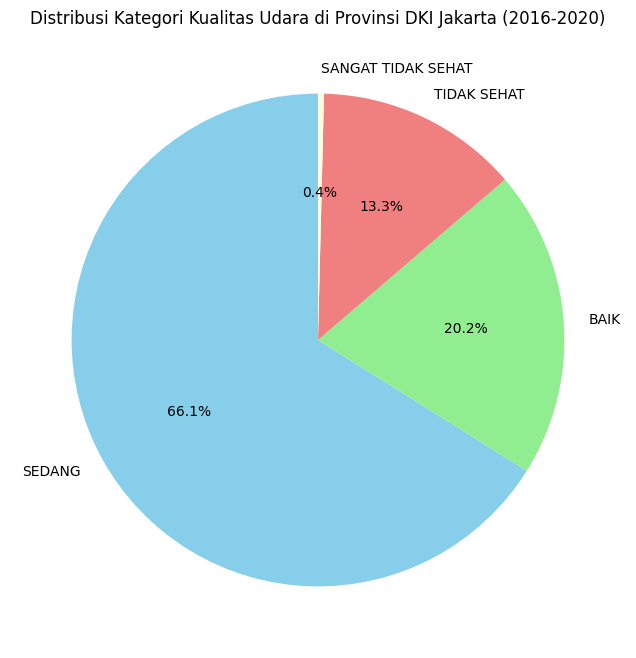

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(kategori_counts, labels=kategori_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 
                                                                                                 'lightgreen', 
                                                                                                 'lightcoral', 
                                                                                                 'lightyellow', 
                                                                                                 'lightpink'])
plt.title('Distribusi Kategori Kualitas Udara di Provinsi DKI Jakarta (2016-2020)')
plt.show()

### Kesimpulan dari piechart diatas

Berdasarkan visualisasi pie chart, berikut adalah kesimpulan:

1. Kategori "SEDANG":

- Menyumbang persentase terbesar dari total kategori kualitas udara (66.1%).
- Mayoritas pengukuran kualitas udara berada pada tingkat "SEDANG," menunjukkan bahwa kualitas udara cenderung moderat di berbagai waktu dan lokasi.

2. Kategori "BAIK":

- Menyumbang persentase sekitar 20.2% dari total kategori kualitas udara.
- Meskipun tidak mendominasi, kategori "BAIK" memberikan kontribusi yang signifikan, menunjukkan bahwa kualitas udara pada tingkat baik juga sering terjadi.

3. Kategori "TIDAK SEHAT":

- Menyumbang persentase sekitar 13.3% dari total kategori kualitas udara.
- Meskipun lebih rendah dibanding "SEDANG" dan "BAIK," kategori "TIDAK SEHAT" masih memiliki andil yang penting, menunjukkan adanya periode atau lokasi dengan kualitas udara yang tidak memadai.

4. Kategori "SANGAT TIDAK SEHAT":

- Menyumbang persentase yang sangat kecil, hanya sekitar 0.4% dari total.
- Meskipun jarang terjadi, adanya kategori "SANGAT TIDAK SEHAT" menunjukkan bahwa terdapat beberapa kasus dengan tingkat pencemaran udara yang sangat tinggi.

**Kesimpulan Umum:**

- Sebagian besar pengukuran menunjukkan kualitas udara dalam kategori "SEDANG," yang dapat diartikan sebagai tingkat pencemaran udara yang moderat.
- Kategori "BAIK" dan "TIDAK SEHAT" juga memberikan kontribusi yang signifikan, menunjukkan variasi kualitas udara dari baik hingga tidak sehat.
- Kategori "SANGAT TIDAK SEHAT" memiliki kontribusi yang sangat kecil, menunjukkan bahwa tingkat pencemaran udara yang sangat tinggi jarang terjadi.

### 4.Bagaimana persentase masing-masing kategori "BAIK", "SEDANG", "TIDAK SEHAT" dan "SANGAT TIDAK SEHAT" terhadap setiap stasiun?

Menghitung persentase masing-masing kategori pada setiap stasiun

In [47]:
percentage_data = combined_df.groupby(['stasiun',
                                       'categori']).size().unstack().div(combined_df.groupby('stasiun').size(), axis=0) * 100

Menampilkan data yang sudah dihitung 

In [48]:
percentage_data

categori,BAIK,SANGAT TIDAK SEHAT,SEDANG,TIDAK SEHAT
stasiun,,,,
DKI1 (Bunderan HI),31.957547,NaN,64.858491,3.183962
DKI2 (Kelapa Gading),19.094602,0.638421,65.118979,15.147998
DKI3 (Jagakarsa),14.726841,NaN,66.983373,18.289786
DKI4 (Lubang Buaya),17.633275,NaN,75.688342,6.678383
DKI5 (Kebon Jeruk),17.568354,1.279814,57.882490,23.269343


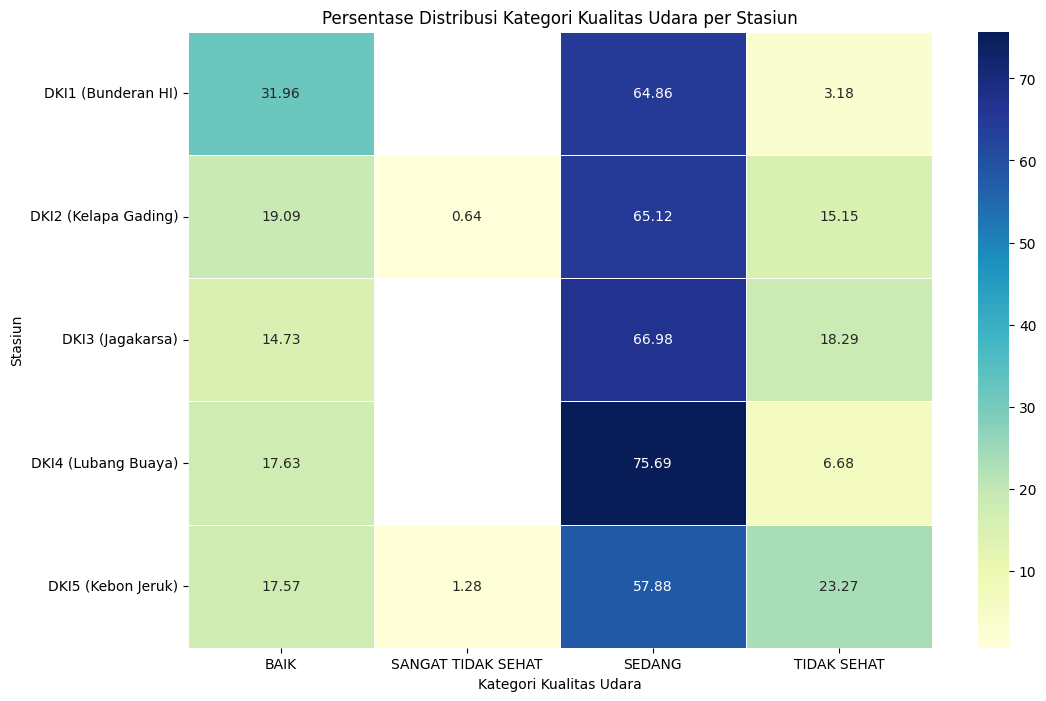

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Persentase Distribusi Kategori Kualitas Udara per Stasiun')
plt.xlabel('Kategori Kualitas Udara')
plt.ylabel('Stasiun')
plt.show()

### Kesimpulan dari visualisasi diatas

Berdasarkan visualisasi heatmap untuk persentase distribusi kategori kualitas udara di setiap stasiun, dapat diambil beberapa kesimpulan:

1. DKI1 (Bunderan HI):

   - Kategori "BAIK" mencakup sekitar 32% dari pengukuran.
   - Kategori "SEDANG" mendominasi dengan sekitar 65% dari pengukuran.
   - Kategori "TIDAK SEHAT" mencapai sekitar 3%.

2. DKI2 (Kelapa Gading):

   - Kategori "BAIK" sekitar 19%.
   - Kategori "SEDANG" merupakan mayoritas dengan sekitar 65% dari pengukuran.
   - Kategori "TIDAK SEHAT" dan "SANGAT TIDAK SEHAT" masing-masing mencakup sekitar 15% dan 0.64%.

3. DKI3 (Jagakarsa):

   - Kategori "BAIK" sekitar 15%.
   - Kategori "SEDANG" mendominasi dengan sekitar 67% dari pengukuran.
   - Kategori "TIDAK SEHAT" mencapai sekitar 18%.

4. DKI4 (Lubang Buaya):

   - Kategori "BAIK" mencakup sekitar 18% dari pengukuran.
   - Kategori "SEDANG" merupakan mayoritas dengan sekitar 76% dari pengukuran.
   - Kategori "TIDAK SEHAT" mencapai sekitar 7%.

5. DKI5 (Kebon Jeruk):
   - Kategori "BAIK" sekitar 18%.
   - Kategori "SEDANG" merupakan mayoritas dengan sekitar 58% dari pengukuran.
   - Kategori "TIDAK SEHAT" mencapai sekitar 23%.

Kesimpulannya, distribusi kategori kualitas udara bervariasi di setiap stasiun, dengan dominasi kategori "SEDANG" pada umumnya. Stasiun DKI3 (Jagakarsa) memiliki proporsi tertinggi kategori "SEDANG," sedangkan DKI4 (Lubang Buaya) memiliki proporsi tertinggi kategori "TIDAK SEHAT." Dengan informasi ini, dapat diidentifikasi stasiun-stasiun yang cenderung memiliki tingkat pencemaran udara yang lebih tinggi.


### 5.Stasiun mana yang memiliki kualitas udara "TIDAK SEHAT" ?

Membuat DataFrame baru (dfts) yang berisi jumlah data dengan kategori 'TIDAK SEHAT' yang dikelompokkan berdasarkan kolom 'stasiun'. 

In [50]:
dfts = combined_df[combined_df['categori'] == 'TIDAK SEHAT'].groupby('stasiun').size().reset_index(name='jumlah')

In [51]:
dfts

,stasiun,jumlah
0,DKI1 (Bunderan HI),54
1,DKI2 (Kelapa Gading),261
2,DKI3 (Jagakarsa),308
3,DKI4 (Lubang Buaya),114
4,DKI5 (Kebon Jeruk),400


Sorting stasiun berdasarkan jumlah "TIDAK SEHAT" secara descending

In [52]:
dfts = dfts.sort_values(by='jumlah', ascending=False)

In [53]:
dfts

,stasiun,jumlah
4,DKI5 (Kebon Jeruk),400
2,DKI3 (Jagakarsa),308
1,DKI2 (Kelapa Gading),261
3,DKI4 (Lubang Buaya),114
0,DKI1 (Bunderan HI),54


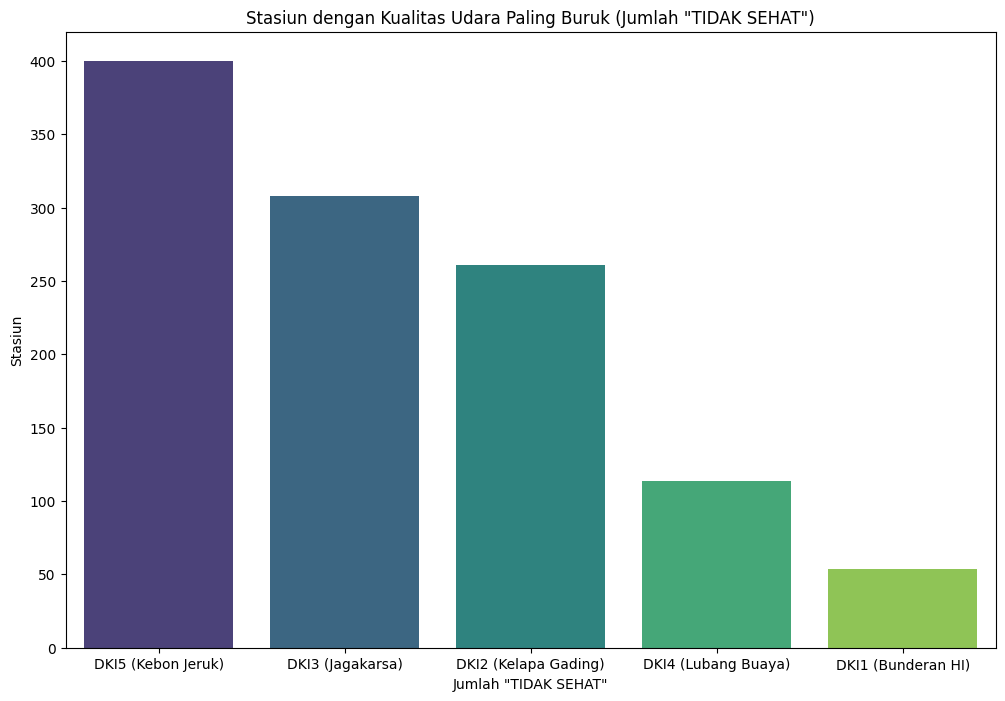

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x='stasiun', y='jumlah', data=dfts, palette='viridis')
plt.title('Stasiun dengan Kualitas Udara Paling Buruk (Jumlah "TIDAK SEHAT")')
plt.xlabel('Jumlah "TIDAK SEHAT"')
plt.ylabel('Stasiun')
plt.show()

In [55]:
import folium

dki_map = folium.Map(location=[-6.196271, 106.822921], zoom_start=11)

folium.Marker(
    location=[-6.196271, 106.822921],popup='DKI1 (Bunderan HI)',
    icon=folium.Icon(color='red')
).add_to(dki_map)

folium.Circle(
    location=[-6.196271, 106.822921],
    radius=3000, color='green', fill=True, fill_color='green',
    fill_opacity=0.2
).add_to(dki_map)

folium.Marker(
    location=[-6.154454, 106.910845], popup='DKI2 (Kelapa Gading)',
    icon=folium.Icon(color='blue')
).add_to(dki_map)

folium.Circle(
    location=[-6.154454, 106.910845],
    radius=3000, color='blue', fill=True, fill_color='blue',
    fill_opacity=0.2
).add_to(dki_map)

folium.Marker(
    location=[-6.356317, 106.804713], popup='DKI3 (Jagakarsa)',
    icon=folium.Icon(color='green')
).add_to(dki_map)

folium.Circle(
    location=[-6.356317, 106.804713],
    radius=3000, color='red', fill=True, fill_color='red',
    fill_opacity=0.2
).add_to(dki_map)

folium.Marker(
    location=[-6.290345, 106.908610], popup='DKI4 (Lubang Buaya)',
    icon=folium.Icon(color='orange')
).add_to(dki_map)

folium.Circle(
    location=[-6.290345, 106.908610],
    radius=3000, color='green', fill=True, fill_color='green',
    fill_opacity=0.2
).add_to(dki_map)

folium.Marker(
    location=[-6.209225, 106.753437], popup='DKI5 (Kebon Jeruk)',
    icon=folium.Icon(color='purple')
).add_to(dki_map)

folium.Circle(
    location=[-6.209225, 106.753437],
    radius=3000, color='red', fill=True, fill_color='red',
    fill_opacity=0.2
).add_to(dki_map)

dki_map

Berdasarkan data yang ditampilkan:

•	DKI5 (Kebon Jeruk): 
Jumlah data dengan kategori 'TIDAK SEHAT': 400 (Warna Merah)
•	DKI3 (Jagakarsa):
Jumlah data dengan kategori 'TIDAK SEHAT': 308 (Warna Merah)
•	DKI2 (Kelapa Gading):
Jumlah data dengan kategori 'TIDAK SEHAT': 261 (Warna Biru)
•	DKI4 (Lubang Buaya):
Jumlah data dengan kategori 'TIDAK SEHAT': 114 (Warna Hijau)
•	DKI1 (Bunderan HI):
Jumlah data dengan kategori 'TIDAK SEHAT': 54 (Warna Hijau)
Kesimpulan:
Stasiun DKI5 (Kebon Jeruk) dan DKI3 (Jagakarsa), ditandai dengan lingkaran warna merah, memiliki jumlah data 'TIDAK SEHAT' tertinggi.
Stasiun DKI2 (Kelapa Gading), ditandai dengan lingkaran warna biru, memiliki jumlah data 'TIDAK SEHAT' sedang di tengah.
Stasiun DKI4 (Lubang Buaya) dan DKI1 (Bunderan HI), ditandai dengan lingkaran warna hijau, memiliki jumlah data 'TIDAK SEHAT' yang lebih rendah dibandingkan dengan yang berwarna merah.


### 6.Tahun berapa yang memiliki kualitas udara yang "BAIK"?

Membuat DataFrame baru (dfbaik) yang berisi jumlah data dengan kategori 'BAIK' yang dikelompokkan berdasarkan kolom 'tahun'. 

In [56]:
dfbaik = combined_df[combined_df['categori'] == 'BAIK'].groupby('tahun').size().reset_index(name='jumlah')

In [57]:
dfbaik

,tahun,jumlah
0,2016,379
1,2017,476
2,2018,311
3,2019,207
4,2020,349


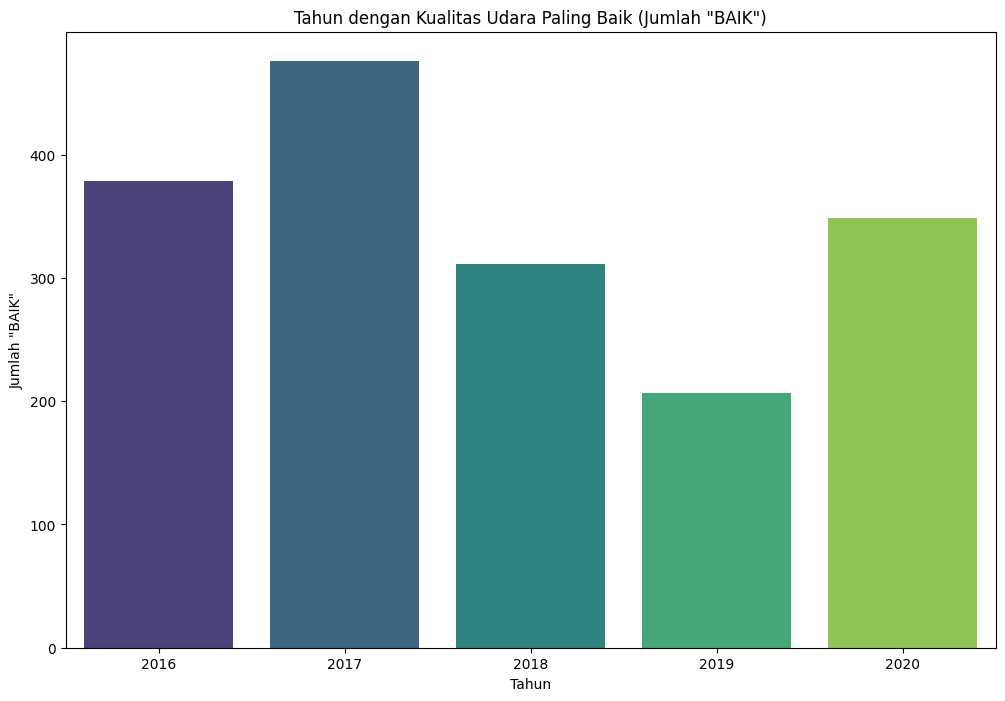

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(x='tahun', y='jumlah', data=dfbaik, palette='viridis')
plt.title('Tahun dengan Kualitas Udara Paling Baik (Jumlah "BAIK")')
plt.xlabel('Tahun')
plt.ylabel('Jumlah "BAIK"')
plt.show()

### Kesimpulan dari barchart diatas

Dari visualisasi di atas, kita dapat membuat beberapa kesimpulan:

- Tahun 2017 memiliki jumlah kategori "BAIK" terbanyak, yaitu sebanyak 476 pengukuran.
- Tahun 2016 memiliki jumlah kategori "BAIK" yang signifikan, namun lebih rendah dibandingkan dengan tahun 2017.
- Tahun 2021 memiliki jumlah kategori "BAIK" yang paling sedikit, yaitu hanya 78 pengukuran.
- Secara umum, terdapat fluktuasi dalam jumlah kategori "BAIK" dari tahun ke tahun, dengan peningkatan yang signifikan pada tahun 2017 dan penurunan pada tahun 2021.

Angka-angka di atas memberikan gambaran tentang variabilitas kategori "BAIK" dalam beberapa tahun terakhir.

Mengganti nilai kategori pada kolom 'categori' dalam DataFrame combined_df dengan nilai numerik yang sesuai, berdasarkan peta mapping yang didefinisikan. 

In [59]:
mapping = {'SEDANG': 2, 'BAIK': 3, 'TIDAK SEHAT': 1, 'SANGAT TIDAK SEHAT': 0}
combined_df['categori'] = combined_df['categori'].replace(mapping)

combined_df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,tahun
0,2016-01-01,DKI1 (Bunderan HI),59.0,19.0,27.0,31.0,1.0,59.0,PM10,2,2016
1,2016-01-02,DKI1 (Bunderan HI),52.0,19.0,17.0,33.0,2.0,52.0,PM10,2,2016
2,2016-01-03,DKI1 (Bunderan HI),44.0,19.0,17.0,36.0,2.0,44.0,PM10,3,2016
3,2016-01-04,DKI1 (Bunderan HI),58.0,21.0,17.0,46.0,5.0,58.0,PM10,2,2016
4,2016-01-05,DKI1 (Bunderan HI),70.0,19.0,17.0,41.0,4.0,70.0,PM10,2,2016


## Analisis Korelasi

Analisis korelasi merupakan salah satu teknik statistik yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih yang bersifat kuantitatif. Bahwa adanya perubahan sebuah variabel disebabkan atau akan diikuti dengan perubahan variabel lain.

Membuat DataFrame baru df_cor yang hanya berisi subset dari DataFrame combined_df. Subset ini terdiri dari kolom-kolom yang diidentifikasi, yaitu 'pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical', dan 'categori'.

In [60]:
df_cor = combined_df.loc[:,['pm10','so2','co','o3','no2','max','critical','categori']]
df_cor.head()

,pm10,so2,co,o3,no2,max,critical,categori
0,59.0,19.0,27.0,31.0,1.0,59.0,PM10,2
1,52.0,19.0,17.0,33.0,2.0,52.0,PM10,2
2,44.0,19.0,17.0,36.0,2.0,44.0,PM10,3
3,58.0,21.0,17.0,46.0,5.0,58.0,PM10,2
4,70.0,19.0,17.0,41.0,4.0,70.0,PM10,2


Melakukan proses label encoding untuk mengubah nilai-nilai dalam kolom-kolom berjenis data objek (string atau kategori) menjadi nilai-nilai numerik. 

In [61]:
label_encoder = preprocessing.LabelEncoder()

df_category = df_cor.select_dtypes(include='object')
df_encode_cor = df_cor.copy()

for column in df_category.columns:
    df_encode_cor[column] = label_encoder.fit_transform(df_cor[column])

Membuat fungsi peta panas (heatmap) dari korelasi antar kolom-kolom dalam DataFrame.

In [62]:
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] 
    plt.figure(figsize=(20,23)) 

    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="plasma", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

Membuat peta panas (heatmap) dari korelasi antar kolom-kolom tertentu dalam DataFrame df_encode_cor. Kolom-kolom yang digunakan untuk membuat heatmap tersebut diidentifikasi dalam list 

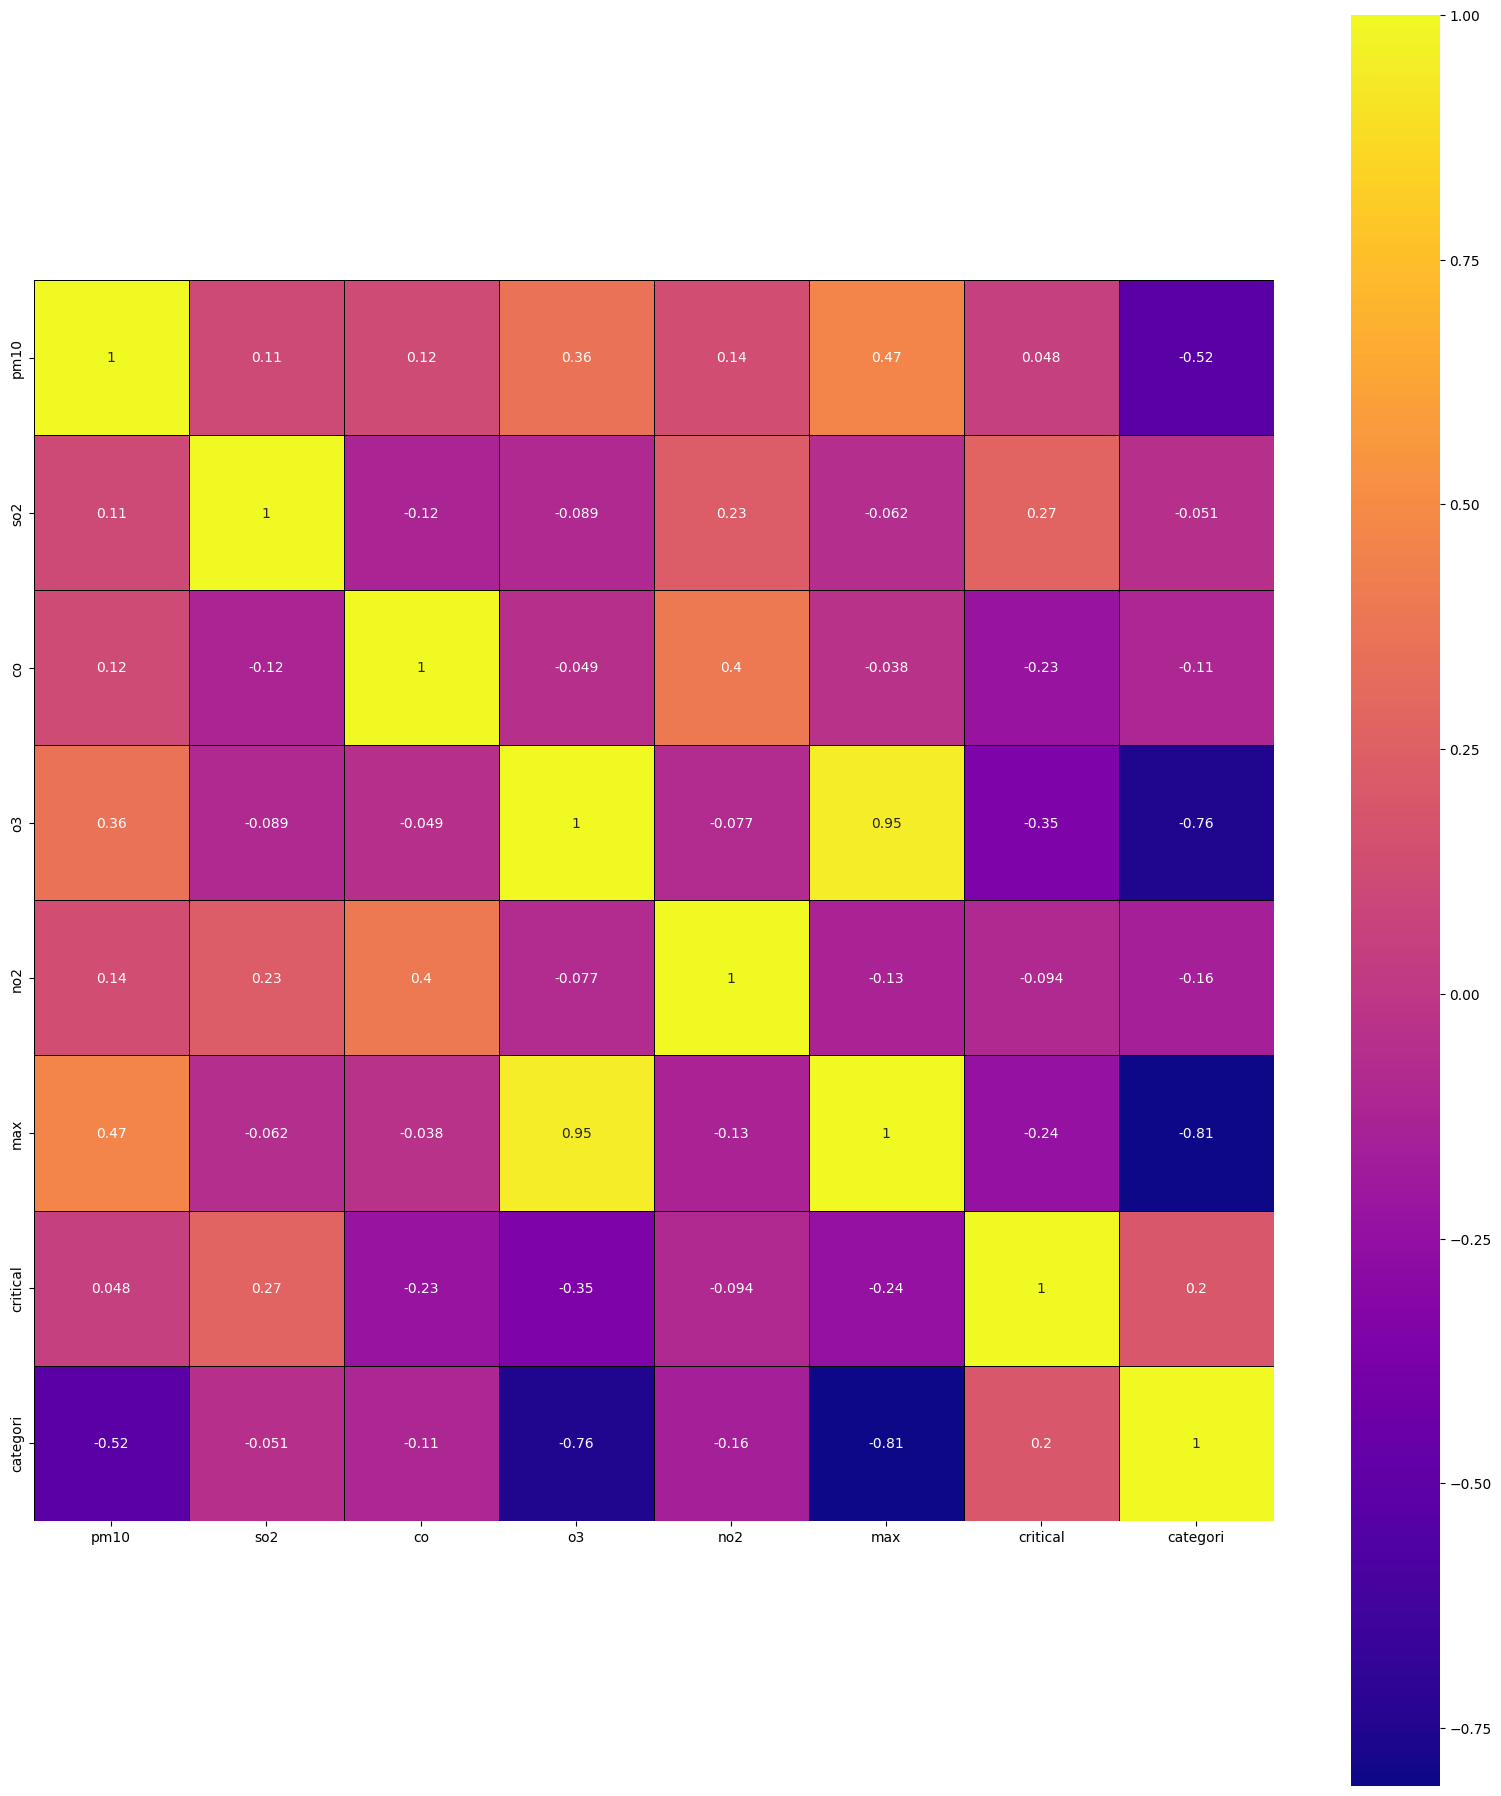

In [63]:
heat_map_modeling = ['pm10','so2','co',
                     'o3','no2','max',
                     'critical','categori']
heat_map(df_encode_cor,heat_map_modeling)

Membuat peta panas (heatmap) korelasi antar kolom-kolom dalam DataFrame df_encode_cor dengan fokus pada korelasi dengan kolom 'categori'. Korelasi diurutkan berdasarkan nilai korelasi dengan 'categori'.

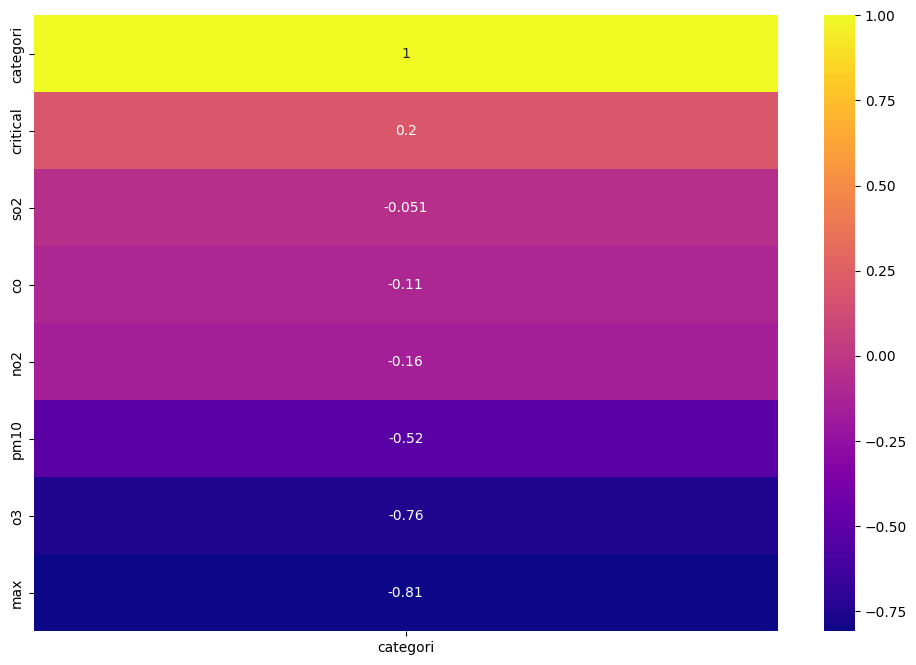

In [64]:
plt.figure(figsize=(12, 8))
corr = df_encode_cor.corr()[['categori']].sort_values(by='categori', ascending=False)
sns.heatmap(corr, annot=True, cmap="plasma");

**Keterangan:** 
Berdasarkan visualisasi heatmap diatas, dipilih beberapa kolom yang memiliki korelasi cukup tinggi dengan kolom `categori` yang kemudian nantinya digunakan untuk variabel X pada modelling. Kolom tersebut diantaranya adalah sebagai berikut:

1. `max` Merupakan nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama. Dalam konteks ini, mungkin merujuk pada parameter kualitas udara tertentu, dengan korelasi sebesar 0.68
2. `o3` Merupakan parameter yang mengukur konsentrasi ozon di udara. Ozon dapat memiliki dampak kesehatan dan lingkungan, tergantung pada konsentrasinya, dengan korelasi sebesar 0.63
3. `pm10` Merupakan parameter yang mengukur konsentrasi partikel berukuran 10 mikrometer atau kurang di udara. Partikel ini dapat mencakup debu, asap, dan materi padat lainnya yang dapat mempengaruhi kualitas udara , dengan korelasi sebesar 0.58
4. `no2` Merupakan parameter yang mengukur konsentrasi nitrogen dioksida di udara. NO2 dapat berasal dari aktivitas pembakaran bahan bakar, seperti kendaraan bermotor dan industri , dengan korelasi sebesar 0.17
5. `co` Merupakan parameter yang mengukur konsentrasi karbon monoksida di udara. CO dapat berasal dari pembakaran bahan bakar fosil dan dapat berdampak negatif pada kesehatan manusia , dengan korelasi sebesar 0.12
6. `so2` Merupakan parameter yang mengukur konsentrasi dioksida belerang di udara. SO2 dapat berasal dari aktivitas pembakaran bahan bakar fosil dan proses industri tertentu , dengan korelasi sebesar 0.063

### Feature Scaling
Feature scaling adalah teknik untuk membuat skala data setiap fitur menjadi sama. Pada project ini, kami menggunakan MinMax Scaler yang melakukan transform feature dengan mengubah setiap data ke range tertentu antara 0-1.

In [65]:
scaler = MinMaxScaler()

df_new = df_encode_cor.copy()
df_model = df_new.loc[:,['pm10','so2','co','o3','no2','max','categori']]

df_model[['pm10','so2','co','o3','no2','max']]

,pm10,so2,co,o3,no2,max
0,59.0,19.0,27.0,31.0,1.0,59.0
1,52.0,19.0,17.0,33.0,2.0,52.0
2,44.0,19.0,17.0,36.0,2.0,44.0
3,58.0,21.0,17.0,46.0,5.0,58.0
4,70.0,19.0,17.0,41.0,4.0,70.0
...,...,...,...,...,...,...
9165,18.0,32.0,4.0,41.0,8.0,41.0
9166,22.0,33.0,5.0,35.0,3.0,35.0
9167,15.0,28.0,4.0,27.0,8.0,28.0
9168,16.0,7.0,3.0,21.0,2.0,21.0


Menampilkan 5 data teratas

In [66]:
df_model.head()

,pm10,so2,co,o3,no2,max,categori
0,59.0,19.0,27.0,31.0,1.0,59.0,2
1,52.0,19.0,17.0,33.0,2.0,52.0,2
2,44.0,19.0,17.0,36.0,2.0,44.0,3
3,58.0,21.0,17.0,46.0,5.0,58.0,2
4,70.0,19.0,17.0,41.0,4.0,70.0,2


# Modelling

Memilih kolom dengan korelasi paling tinggi berdasarkan analisis korelasi yang telah dilakukan. Kolom yang dipilih sudah melalui proses encoding dan feature scaling.

In [67]:
df_kondisi = df_encode_cor.loc[:,['pm10','so2','co','o3','no2','max','categori']]
df_kondisi.head()

,pm10,so2,co,o3,no2,max,categori
0,59.0,19.0,27.0,31.0,1.0,59.0,2
1,52.0,19.0,17.0,33.0,2.0,52.0,2
2,44.0,19.0,17.0,36.0,2.0,44.0,3
3,58.0,21.0,17.0,46.0,5.0,58.0,2
4,70.0,19.0,17.0,41.0,4.0,70.0,2


Menampilkan daftar nilai unik dalam kolom 'categori' beserta jumlah kemunculannya masing-masing. 

In [68]:
df_kondisi['categori'].value_counts()

2    5637
3    1722
1    1137
0      33
Name: categori, dtype: int64

## 1.Logistic Regression
### Modelling

Load model LogisticRegression

In [69]:
lr_model = LogisticRegression()

Melakukan persiapan data untuk pemodelan dengan memisahkan fitur (x) dan target (y) dari DataFrame df_kondisi. Fitur-fitur tersebut disimpan dalam variabel x, sedangkan targetnya disimpan dalam variabel y. Selanjutnya, data dibagi menjadi data pelatihan (x_train1, y_train1) dan data pengujian (x_test1, y_test1) menggunakan fungsi train_test_split. Pembagian dilakukan dengan mengalokasikan 70% data untuk pelatihan dan 30% untuk pengujian, serta menggunakan random_state untuk memastikan reproduktibilitas hasil.

In [70]:
x = df_kondisi.drop(columns=['categori'],axis=1).values
y = df_kondisi['categori'].values

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)

Menampilkan tahap pelatihan (training) model dengan menggunakan algoritma Linear Regression (lr_model). 

In [71]:
lr_model.fit(x_train1, y_train1.ravel())

LogisticRegression()

Membuat prediksi menggunakan model linear regression (lr_model) pada data pengujian (x_test1).

In [72]:
y_pred1 = lr_model.predict(x_test1)

Membuat prediksi pada data pelatihan (x_train1). Selanjutnya, mengukur akurasi model dengan membandingkan prediksi dengan nilai sebenarnya pada target pelatihan (y_train1). Hasil akurasi kemudian dicetak ke layar sebagai ukuran seberapa baik model dapat memprediksi data pelatihan.

In [73]:
lr_predict_train = lr_model.predict(x_train1)

print("Accuracy :", metrics.accuracy_score(y_train1, lr_predict_train))

Accuracy : 0.8371859296482412


Membuat prediksi pada data test (x_test1). Selanjutnya, mengukur akurasi model dengan membandingkan prediksi dengan nilai sebenarnya pada target pelatihan (y_test1). Hasil akurasi kemudian dicetak ke layar sebagai ukuran seberapa baik model dapat memprediksi data pelatihan.

In [74]:
lr_predict_test = lr_model.predict(x_test1)

print("Accuracy :", metrics.accuracy_score(y_test1, lr_predict_test))

Accuracy : 0.8397811645173896


### Evaluasi

Menampilkan confusion matrix untuk model regresi linear pada data pengujian (x_test1 dan y_test1). Confusion matrix memberikan gambaran tentang seberapa baik model dapat memprediksi kelas-kelas pada data pengujian.

1. Kategori Pertama:

- True Positive (TP): 10 data diklasifikasikan dengan benar sebagai kategori pertama.
- False Positive (FP): Ada 4 data yang salah diklasifikasikan sebagai kategori pertama.
- False Negative (FN): Tidak ada data yang seharusnya masuk ke kategori pertama, tapi terklasifikasikan sebagai kategori lain.
- True Negative (TN): Tidak ada data yang seharusnya masuk ke kategori pertama, dan benar diklasifikasikan sebagai bukan kategori pertama.

2. Kategori Kedua:

- True Positive (TP): 197 data diklasifikasikan dengan benar sebagai kategori kedua.
- False Positive (FP): Ada 9 data yang salah diklasifikasikan sebagai kategori kedua.
- False Negative (FN): Ada 139 data yang seharusnya masuk ke kategori kedua, tapi terklasifikasikan sebagai kategori lain.
- True Negative (TN): Tidak ada data yang seharusnya masuk ke kategori kedua, dan benar diklasifikasikan sebagai bukan kategori kedua.

3. Kategori Ketiga:

- True Positive (TP): 1601 data diklasifikasikan dengan benar sebagai kategori ketiga.
- False Positive (FP): Ada 2 data yang salah diklasifikasikan sebagai kategori ketiga.
- False Negative (FN): Ada 74 data yang seharusnya masuk ke kategori ketiga, tapi terklasifikasikan sebagai kategori lain.
- True Negative (TN): Ada 19 data yang seharusnya masuk ke kategori ketiga, tapi terklasifikasikan sebagai kategori lain.

4. Kategori Keempat:

- True Positive (TP): 341 data diklasifikasikan dengan benar sebagai kategori keempat.
- False Positive (FP): Ada 160 data yang salah diklasifikasikan sebagai kategori keempat.
- False Negative (FN): Ada 2 data yang seharusnya masuk ke kategori keempat, tapi terklasifikasikan sebagai kategori lain.
- True Negative (TN): Ada 1 data yang seharusnya masuk ke kategori keempat, tapi terklasifikasikan sebagai kategori lain.

In [75]:
# confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test1, lr_predict_test)))

Confusion Matrix
[[  10    4    0    0]
 [   9  197  139    0]
 [   2   74 1601   19]
 [   1    2  160  341]]


# Classification Report

Classification report memberikan rangkuman metrik evaluasi seperti precision, recall, dan F1-score untuk setiap kategori dan keseluruhan model. Berikut penjelasan singkatnya:

- **Precision:** Ketepatan model dalam mengidentifikasi instance positif. Dihitung sebagai TP / (TP + FP).
- **Recall:** Seberapa baik model dapat menemukan semua instance positif. Dihitung sebagai TP / (TP + FN).
- **F1-score:** Rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara keduanya.
- **Support:** Jumlah instance dalam setiap kategori.
- **Accuracy:** Akurasi keseluruhan model.

Berikut interpretasi singkat untuk setiap kategori dan metrik keseluruhan:

- **Kategori 0 (0):**
  - Precision: 0.45
  - Recall: 0.71
  - F1-score: 0.56

- **Kategori 1 (1):**
  - Precision: 0.71
  - Recall: 0.57
  - F1-score: 0.63

- **Kategori 2 (2):**
  - Precision: 0.84
  - Recall: 0.94
  - F1-score: 0.89

- **Kategori 3 (3):**
  - Precision: 0.95
  - Recall: 0.68
  - F1-score: 0.79

- **Keseluruhan Model:**
  - Akurasi (Accuracy): 0.84
  - Macro avg F1-score: 0.72
  - Weighted avg F1-score: 0.83

Classification report memberikan pandangan holistik tentang performa model pada setiap kategori dan secara keseluruhan. Akurasi, F1-score, precision, dan recall dapat membantu memahami seberapa baik model berkinerja dalam mengklasifikasikan data pada masing-masing kategori.


In [76]:
# Classification report
print("Classification Report :")
print(metrics.classification_report(y_test1, lr_predict_test))

Classification Report :
              precision    recall  f1-score   support

           0       0.45      0.71      0.56        14
           1       0.71      0.57      0.63       345
           2       0.84      0.94      0.89      1696
           3       0.95      0.68      0.79       504

    accuracy                           0.84      2559
   macro avg       0.74      0.73      0.72      2559
weighted avg       0.84      0.84      0.83      2559



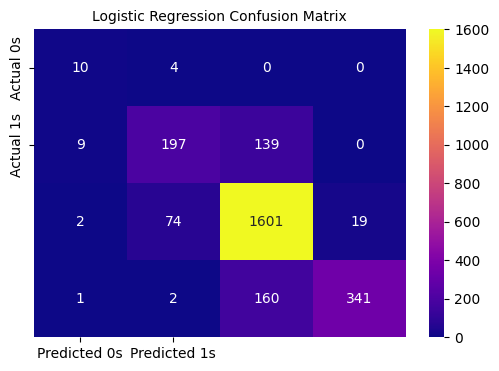

In [77]:
cm = confusion_matrix(y_test1, y_pred1)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Logistic Regression Confusion Matrix", fontsize=10)
sns.heatmap(cm, annot=True, cmap='plasma', fmt='g', 
            xticklabels = ('Predicted 0s','Predicted 1s'), 
            yticklabels = ('Actual 0s','Actual 1s'));

## 2. Suppport Vector Machine
### Modelling

Load Model SVM

In [78]:
svmcla_model = OneVsRestClassifier(BaggingClassifier(SVC(C=10, kernel='rbf', 
                                                         random_state=9, 
                                                         probability=True), n_jobs=-1))

Melakukan persiapan data untuk pemodelan dengan memisahkan fitur (x) dan target (y) dari DataFrame df_kondisi. Fitur-fitur tersebut disimpan dalam variabel x, sedangkan targetnya disimpan dalam variabel y. Selanjutnya, data dibagi menjadi data pelatihan (x_train2, y_train2) dan data pengujian (x_test2, y_test2) menggunakan fungsi train_test_split. Pembagian dilakukan dengan mengalokasikan 70% data untuk pelatihan dan 30% untuk pengujian, serta menggunakan random_state untuk memastikan reproduktibilitas hasil.

In [79]:
x2 = df_kondisi.drop(['categori'], axis = 1)
y2 = df_kondisi['categori']

# Memisahkan data menjadi data training dan data testing
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.3, random_state=0)

Menampilkan tahap pelatihan (training) model dengan menggunakan algoritma SVM (svmcla_model). 

In [80]:
# model training
svmcla_model.fit(x_train2, y_train2)

OneVsRestClassifier(estimator=BaggingClassifier(estimator=SVC(C=10,
                                                              probability=True,
                                                              random_state=9),
                                                n_jobs=-1))

Membuat prediksi menggunakan model svm (svmcla_model) pada data pengujian (x_test2).

In [81]:
y_pred2 = svmcla_model.predict(x_test2)

Membuat prediksi pada data pelatihan (x_train2). Selanjutnya, mengukur akurasi model dengan membandingkan prediksi dengan nilai sebenarnya pada target pelatihan (y_train2). Hasil akurasi kemudian dicetak ke layar sebagai ukuran seberapa baik model dapat memprediksi data pelatihan.

In [82]:
# Mengevaluasi model data train
svm_predict_train = svmcla_model.predict(x_train2)

print("Accuracy :", metrics.accuracy_score(y_train2, svm_predict_train))

Accuracy : 0.9938023450586264


Membuat prediksi pada data test (x_test2). Selanjutnya, mengukur akurasi model dengan membandingkan prediksi dengan nilai sebenarnya pada target pelatihan (y_test2). Hasil akurasi kemudian dicetak ke layar sebagai ukuran seberapa baik model dapat memprediksi data pelatihan.

In [83]:
# Mengevaluasi model data test
svm_predict_test = svmcla_model.predict(x_test2)

print("Accuracy :", metrics.accuracy_score(y_test2, svm_predict_test))

Accuracy : 0.9941383352872216


### Evaluasi

Menampilkan confusion matrix untuk model SVM pada data pengujian (x_test2 dan y_test2). Confusion matrix memberikan gambaran tentang seberapa baik model dapat memprediksi kelas-kelas pada data pengujian.

1. Kategori Pertama:

- True Positive (TP): 12 data diklasifikasikan dengan benar sebagai kategori pertama.
- False Positive (FP): Ada 2 data yang salah diklasifikasikan sebagai kategori pertama.
- False Negative (FN): Tidak ada data yang seharusnya masuk ke kategori pertama, tapi terklasifikasikan sebagai kategori lain.
- True Negative (TN): Tidak ada data yang seharusnya masuk ke kategori pertama, dan benar diklasifikasikan sebagai bukan kategori pertama.

2. Kategori Kedua:

- True Positive (TP): 344 data diklasifikasikan dengan benar sebagai kategori kedua.
- False Positive (FP): Tidak ada data yang salah diklasifikasikan sebagai kategori kedua.
- False Negative (FN): Ada 1 data yang seharusnya masuk ke kategori kedua, tapi terklasifikasikan sebagai kategori lain.
- True Negative (TN): Tidak ada data yang seharusnya masuk ke kategori kedua, dan benar diklasifikasikan sebagai bukan kategori kedua.
    
3. Kategori Ketiga:

- True Positive (TP): 1693 data diklasifikasikan dengan benar sebagai kategori ketiga.
- False Positive (FP): Ada 3 data yang salah diklasifikasikan sebagai kategori ketiga.
- False Negative (FN): Tidak ada data yang seharusnya masuk ke kategori ketiga, tapi terklasifikasikan sebagai kategori lain.
- True Negative (TN): Tidak ada data yang seharusnya masuk ke kategori ketiga, dan benar diklasifikasikan sebagai bukan kategori ketiga.

4. Kategori Keempat:

- True Positive (TP): 493 data diklasifikasikan dengan benar sebagai kategori keempat.
- False Positive (FP): Ada 11 data yang salah diklasifikasikan sebagai kategori keempat.
- False Negative (FN): Ada 0 data yang seharusnya masuk ke kategori keempat, tapi terklasifikasikan sebagai kategori lain.
- True Negative (TN): Tidak ada data yang seharusnya masuk ke kategori keempat, dan benar diklasifikasikan sebagai bukan kategori keempat.

In [84]:
# confusion matrix
print("Confusion Matrix :")
print("{0}".format(metrics.confusion_matrix(y_test2, svm_predict_test)))

Confusion Matrix :
[[  12    2    0    0]
 [   0  344    1    0]
 [   0    0 1695    1]
 [   0    0   11  493]]


# Classification Report

Classification report memberikan rangkuman metrik evaluasi seperti precision, recall, dan F1-score untuk setiap kategori dan keseluruhan model. Berikut penjelasan singkatnya:

- **Precision:** Ketepatan model dalam mengidentifikasi instance positif. Dihitung sebagai TP / (TP + FP).
- **Recall:** Seberapa baik model dapat menemukan semua instance positif. Dihitung sebagai TP / (TP + FN).
- **F1-score:** Rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara keduanya.
- **Support:** Jumlah instance dalam setiap kategori.
- **Accuracy:** Akurasi keseluruhan model.

Berikut interpretasi singkat untuk setiap kategori dan metrik keseluruhan:

- **Kategori 0 (0):**
  - Precision: 1.00
  - Recall: 0.86
  - F1-score: 0.92

- **Kategori 1 (1):**
  - Precision: 0.99
  - Recall: 1.00
  - F1-score: 1.00

- **Kategori 2 (2):**
  - Precision: 0.99
  - Recall: 1.00
  - F1-score: 1.00

- **Kategori 3 (3):**
  - Precision: 0.99
  - Recall: 0.98
  - F1-score: 0.99

- **Keseluruhan Model:**
  - Akurasi (Accuracy): 0.99
  - Macro avg F1-score: 0.98
  - Weighted avg F1-score: 0.99

Classification report memberikan pandangan holistik tentang performa model pada setiap kategori dan secara keseluruhan. Akurasi, F1-score, precision, dan recall dapat membantu memahami seberapa baik model berkinerja dalam mengklasifikasikan data pada masing-masing kategori.


In [85]:
# Classification report
print("Classification Report :")
print(metrics.classification_report(y_test2, svm_predict_test))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.99      1.00      1.00       345
           2       0.99      1.00      1.00      1696
           3       1.00      0.98      0.99       504

    accuracy                           0.99      2559
   macro avg       1.00      0.96      0.98      2559
weighted avg       0.99      0.99      0.99      2559



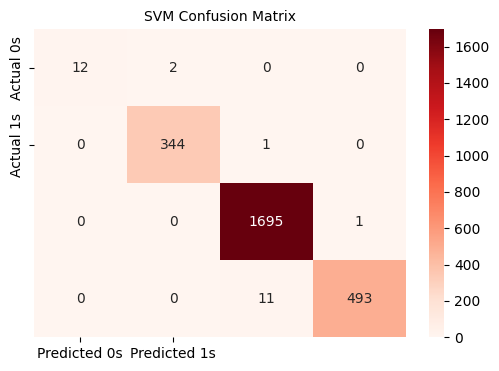

In [86]:
cm2 = confusion_matrix(y_test2, y_pred2)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("SVM Confusion Matrix", fontsize=10)
sns.heatmap(cm2, annot=True, cmap='Reds', fmt='g', 
            xticklabels = ('Predicted 0s','Predicted 1s'), 
            yticklabels = ('Actual 0s','Actual 1s'));

## Model Inference

In [87]:
input_data = np.array([[65.0,13.0,26.0,56.0,10.0,65.0]])
prediction = svmcla_model.predict(input_data)
print("prediksi kualitas udara :", prediction)

prediksi kualitas udara : [2]


In [88]:
input_data = np.array([[15.0,16.0,15.0,101.0,8.0,101.0]])
prediction = lr_model.predict(input_data)
print("prediksi kualitas udara :", prediction)

prediksi kualitas udara : [1]


In [89]:
model_inference = {'pm10': [52.0, 44.0, 18.0, 22.0],
                   'so2': [19.0, 19.0, 32.0, 33.0],  
                   'co': [26.0, 26.0, 4.0, 5.0],
                   'o3': [33.0, 36.0, 41.0, 35.0],
                   'no2': [2.0, 2.0, 9.0, 3.0],
                   'max': [59.0, 44.0, 41.0, 35.0],
                  }
model_inference = pd.DataFrame(model_inference)

In [90]:
model_inference

,pm10,so2,co,o3,no2,max
0,52.0,19.0,26.0,33.0,2.0,59.0
1,44.0,19.0,26.0,36.0,2.0,44.0
2,18.0,32.0,4.0,41.0,9.0,41.0
3,22.0,33.0,5.0,35.0,3.0,35.0


In [91]:
prediksi = svmcla_model.predict(model_inference)
prediksi

array([2, 3, 3, 3], dtype=int64)

In [92]:
prediksi = lr_model.predict(model_inference)
prediksi

array([2, 3, 3, 3], dtype=int64)

In [93]:
df_model.head()

,pm10,so2,co,o3,no2,max,categori
0,59.0,19.0,27.0,31.0,1.0,59.0,2
1,52.0,19.0,17.0,33.0,2.0,52.0,2
2,44.0,19.0,17.0,36.0,2.0,44.0,3
3,58.0,21.0,17.0,46.0,5.0,58.0,2
4,70.0,19.0,17.0,41.0,4.0,70.0,2


In [94]:
df_model.tail()

,pm10,so2,co,o3,no2,max,categori
9165,18.0,32.0,4.0,41.0,8.0,41.0,3
9166,22.0,33.0,5.0,35.0,3.0,35.0,3
9167,15.0,28.0,4.0,27.0,8.0,28.0,3
9168,16.0,7.0,3.0,21.0,2.0,21.0,3
9169,18.0,13.0,6.0,24.0,3.0,24.0,3


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.839781,0.843387,0.839781,0.834046
1,SVM,0.993357,0.993375,0.993357,0.993313


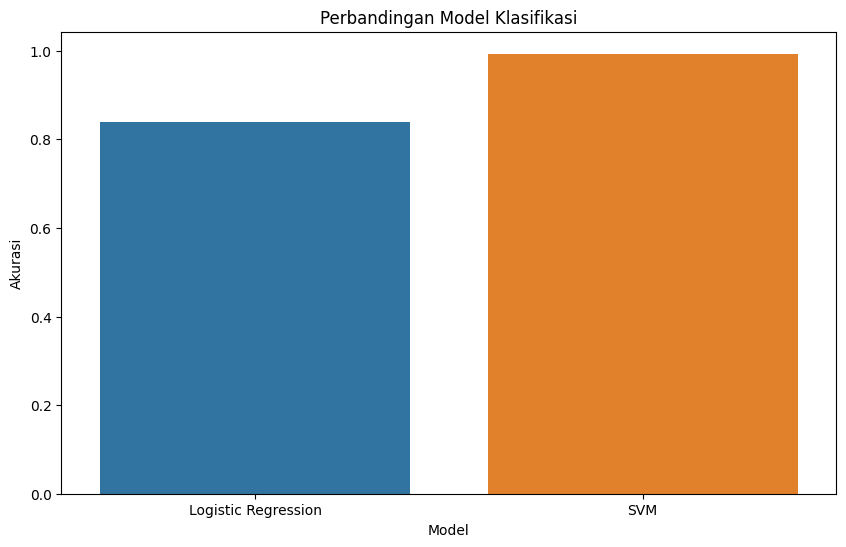

In [95]:
models = [('Logistic Regression', lr_model),
          ('SVM', svmcla_model),
         ]

x = df_kondisi.drop(columns=['categori'], axis=1).values
y = df_kondisi['categori'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted')  
    f1 = f1_score(y_test, y_pred, average='weighted')  
    return accuracy, precision, recall, f1

results = []
for name, model in models:
    model.fit(x_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, x_test, y_test)
    results.append([name, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(results_df)

plt.figure(figsize=(10, 6))
sns.color_palette("Set2")
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Perbandingan Model Klasifikasi')
plt.xticks(rotation=0)
plt.ylabel('Akurasi')
plt.show()

Kesimpulan dari evaluasi dua model, yaitu Logistic Regression dan SVM, dapat diperkaya dengan memasukkan pertimbangan terkait jenis klasifikasi multiclass:

1. Akurasi Model:

Logistic Regression: 83.98%

SVM: 99.30%

Kesimpulan:

Model SVM menunjukkan kinerja yang signifikan lebih tinggi daripada Logistic Regression dalam kasus multiclass classification. Hal ini sejalan dengan sifat algoritma, di mana SVM lebih efektif menangani masalah klasifikasi dengan lebih dari dua kategori.

2. Presisi Model:

Logistic Regression: 84.34%

SVM: 99.30%

Kesimpulan:

SVM mempertahankan presisi yang sangat tinggi, mencerminkan kemampuannya dalam mengklasifikasikan dengan akurat setiap kelas dalam masalah multiclass, sementara Logistic Regression memiliki presisi yang baik, namun lebih rendah dibandingkan SVM.

3. Recall Model:

Logistic Regression: 83.98%

SVM: 99.30%

Kesimpulan:

SVM memiliki recall yang sangat tinggi, menunjukkan kemampuannya dalam mendeteksi sebagian besar instance positif dari setiap kelas dalam masalah multiclass. Logistic Regression juga memiliki recall yang baik, namun tidak setinggi SVM.

4. F1 Score Model:

Logistic Regression: 83.40%

SVM: 99.29%

Kesimpulan:

SVM memiliki nilai F1 Score yang sangat tinggi, mencerminkan keseimbangan yang baik antara presisi dan recall dalam konteks multiclass classification. Logistic Regression juga memiliki nilai F1 Score yang baik, namun lebih rendah dibandingkan SVM.

In [96]:
import pickle

with open('udara_svmnew.pkl', 'wb') as model_file:
    pickle.dump(svmcla_model, model_file)